In [1]:
import pandas as pd
import numpy as np
from datetime import time
from collections import defaultdict
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [2]:
data = pd.read_csv('27SEP17.csv')

In [3]:
#adjustment to max count to account for variablity in car counts
adj = 2
spots = np.array([int(data.ix[i][1][20]) for i in range(len(data))])
max_spots = max(spots)
times = [int(data.ix[i][0][32:34])*100+int(data.ix[i][0][35:37]) for i in range(len(data))]
spots_util = spots / (max_spots - adj)


C:\Users\Patrick.Kuiper\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#Dict for utilization ((raw number of cars) / (max number of cars - adjustment)) for single observation at time
util_groups = defaultdict(list)
#Dict for raw number of cars for single observation at time
max_groups = defaultdict(list)
for i in range(len(times)):
    util_groups[times[i]].append(spots_util[i])
    max_groups[times[i]].append(spots[i])

In [14]:
time_dict_util = {}
time_dict_max = {}
time_dict_avg = {}
for i in util_groups.keys():
    #Utilization of parking by time period
    time_dict_util[i] = (np.mean(util_groups[i]), np.std(util_groups[i]))
    # dict of times , with a count for the number of times the (max_spots - adj) number of cars was met
    time_dict_max[i] = sum(max_groups[i] == (max_spots - adj))
    # Dict of the average number of cars by time interval
    time_dict_avg[i] = np.mean(max_groups[i])

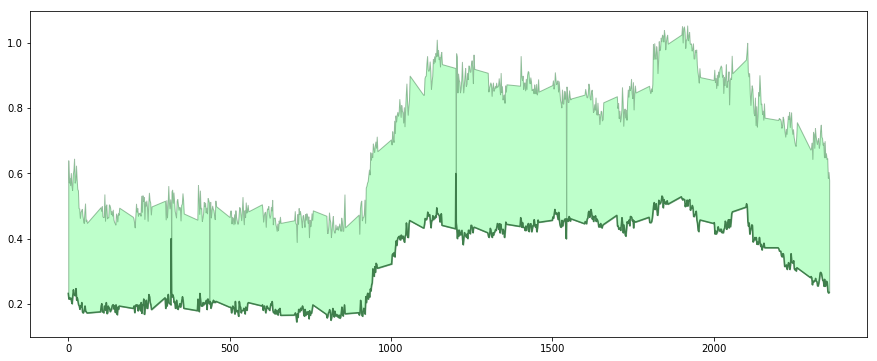

In [16]:
# Plot the average utilization of space with 2 x STD for 95 % CI
std_adjust = 2
times = np.array(sorted(time_dict_util.keys()))
means_avg_car = np.array([time_dict_util[i][0] for i in times])
error = np.array([time_dict_util[i][1] for i in times]) * std_adjust
plt.figure(figsize=(15,6))
plt.plot(times, means_avg_car, 'k', color='#3F7F4C')
plt.fill_between(times, means_avg_car, means_avg_car+error,
    alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.show()

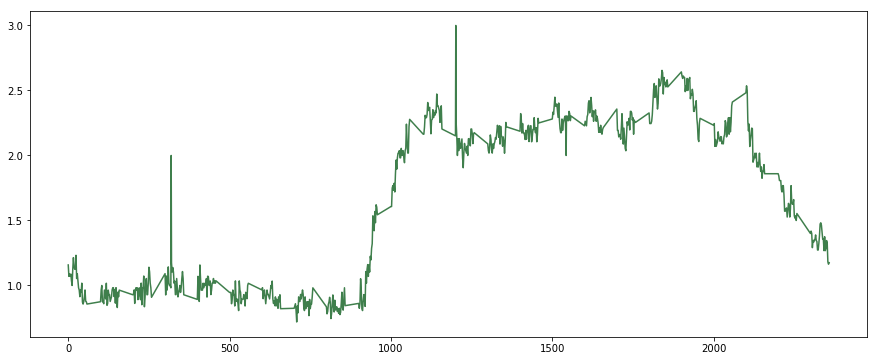

In [20]:
# Plot the raw number of cars, should look like utilization
plt.figure(figsize=(15,6))
means_num_cars = np.array([time_dict_avg[i] for i in times])
plt.plot(times, means_num_cars, 'k', color='#3F7F4C')
plt.show()

In [21]:
# Figure out the average rate of change of cars 
# Attempting to figure out an inter-arrival time for cars for poisson $\lambda$ parameter
car_diff = np.array([time_dict_avg[times[i]] - time_dict_avg[times[i - 1]]  for i in range(1, len(times))])

In [27]:
np.mean(car_diff)

2.4265366043046221e-05

In [32]:
time_dict_avg[times[360]]

2.3818181818181818

In [43]:
time_start = 272 # index for 0900
time_end = 720 # index for 2352

In [47]:
np.mean(car_diff[time_start:time_end])

0.0010384012539184956